# __Akshat Sharma 102217107__

In [42]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

In [43]:

digits = load_digits()
X = digits.data
y = digits.target
df = pd.DataFrame(data=digits.data, columns=digits.feature_names)
df['target_number'] = y

In [44]:
df.head()
# df.shape

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target_number
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


C:\Users\aksha\AppData\Local\Temp\ipykernel_25960\536886889.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="target_number",data=df,palette='viridis')


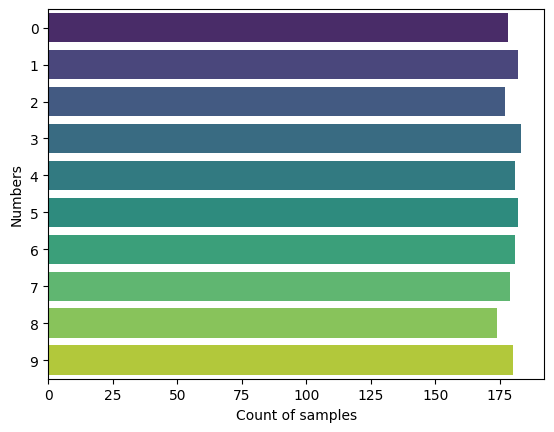

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(y="target_number",data=df,palette='viridis')
plt.xlabel("Count of samples")
plt.ylabel("Numbers")
plt.show()

<Axes: >

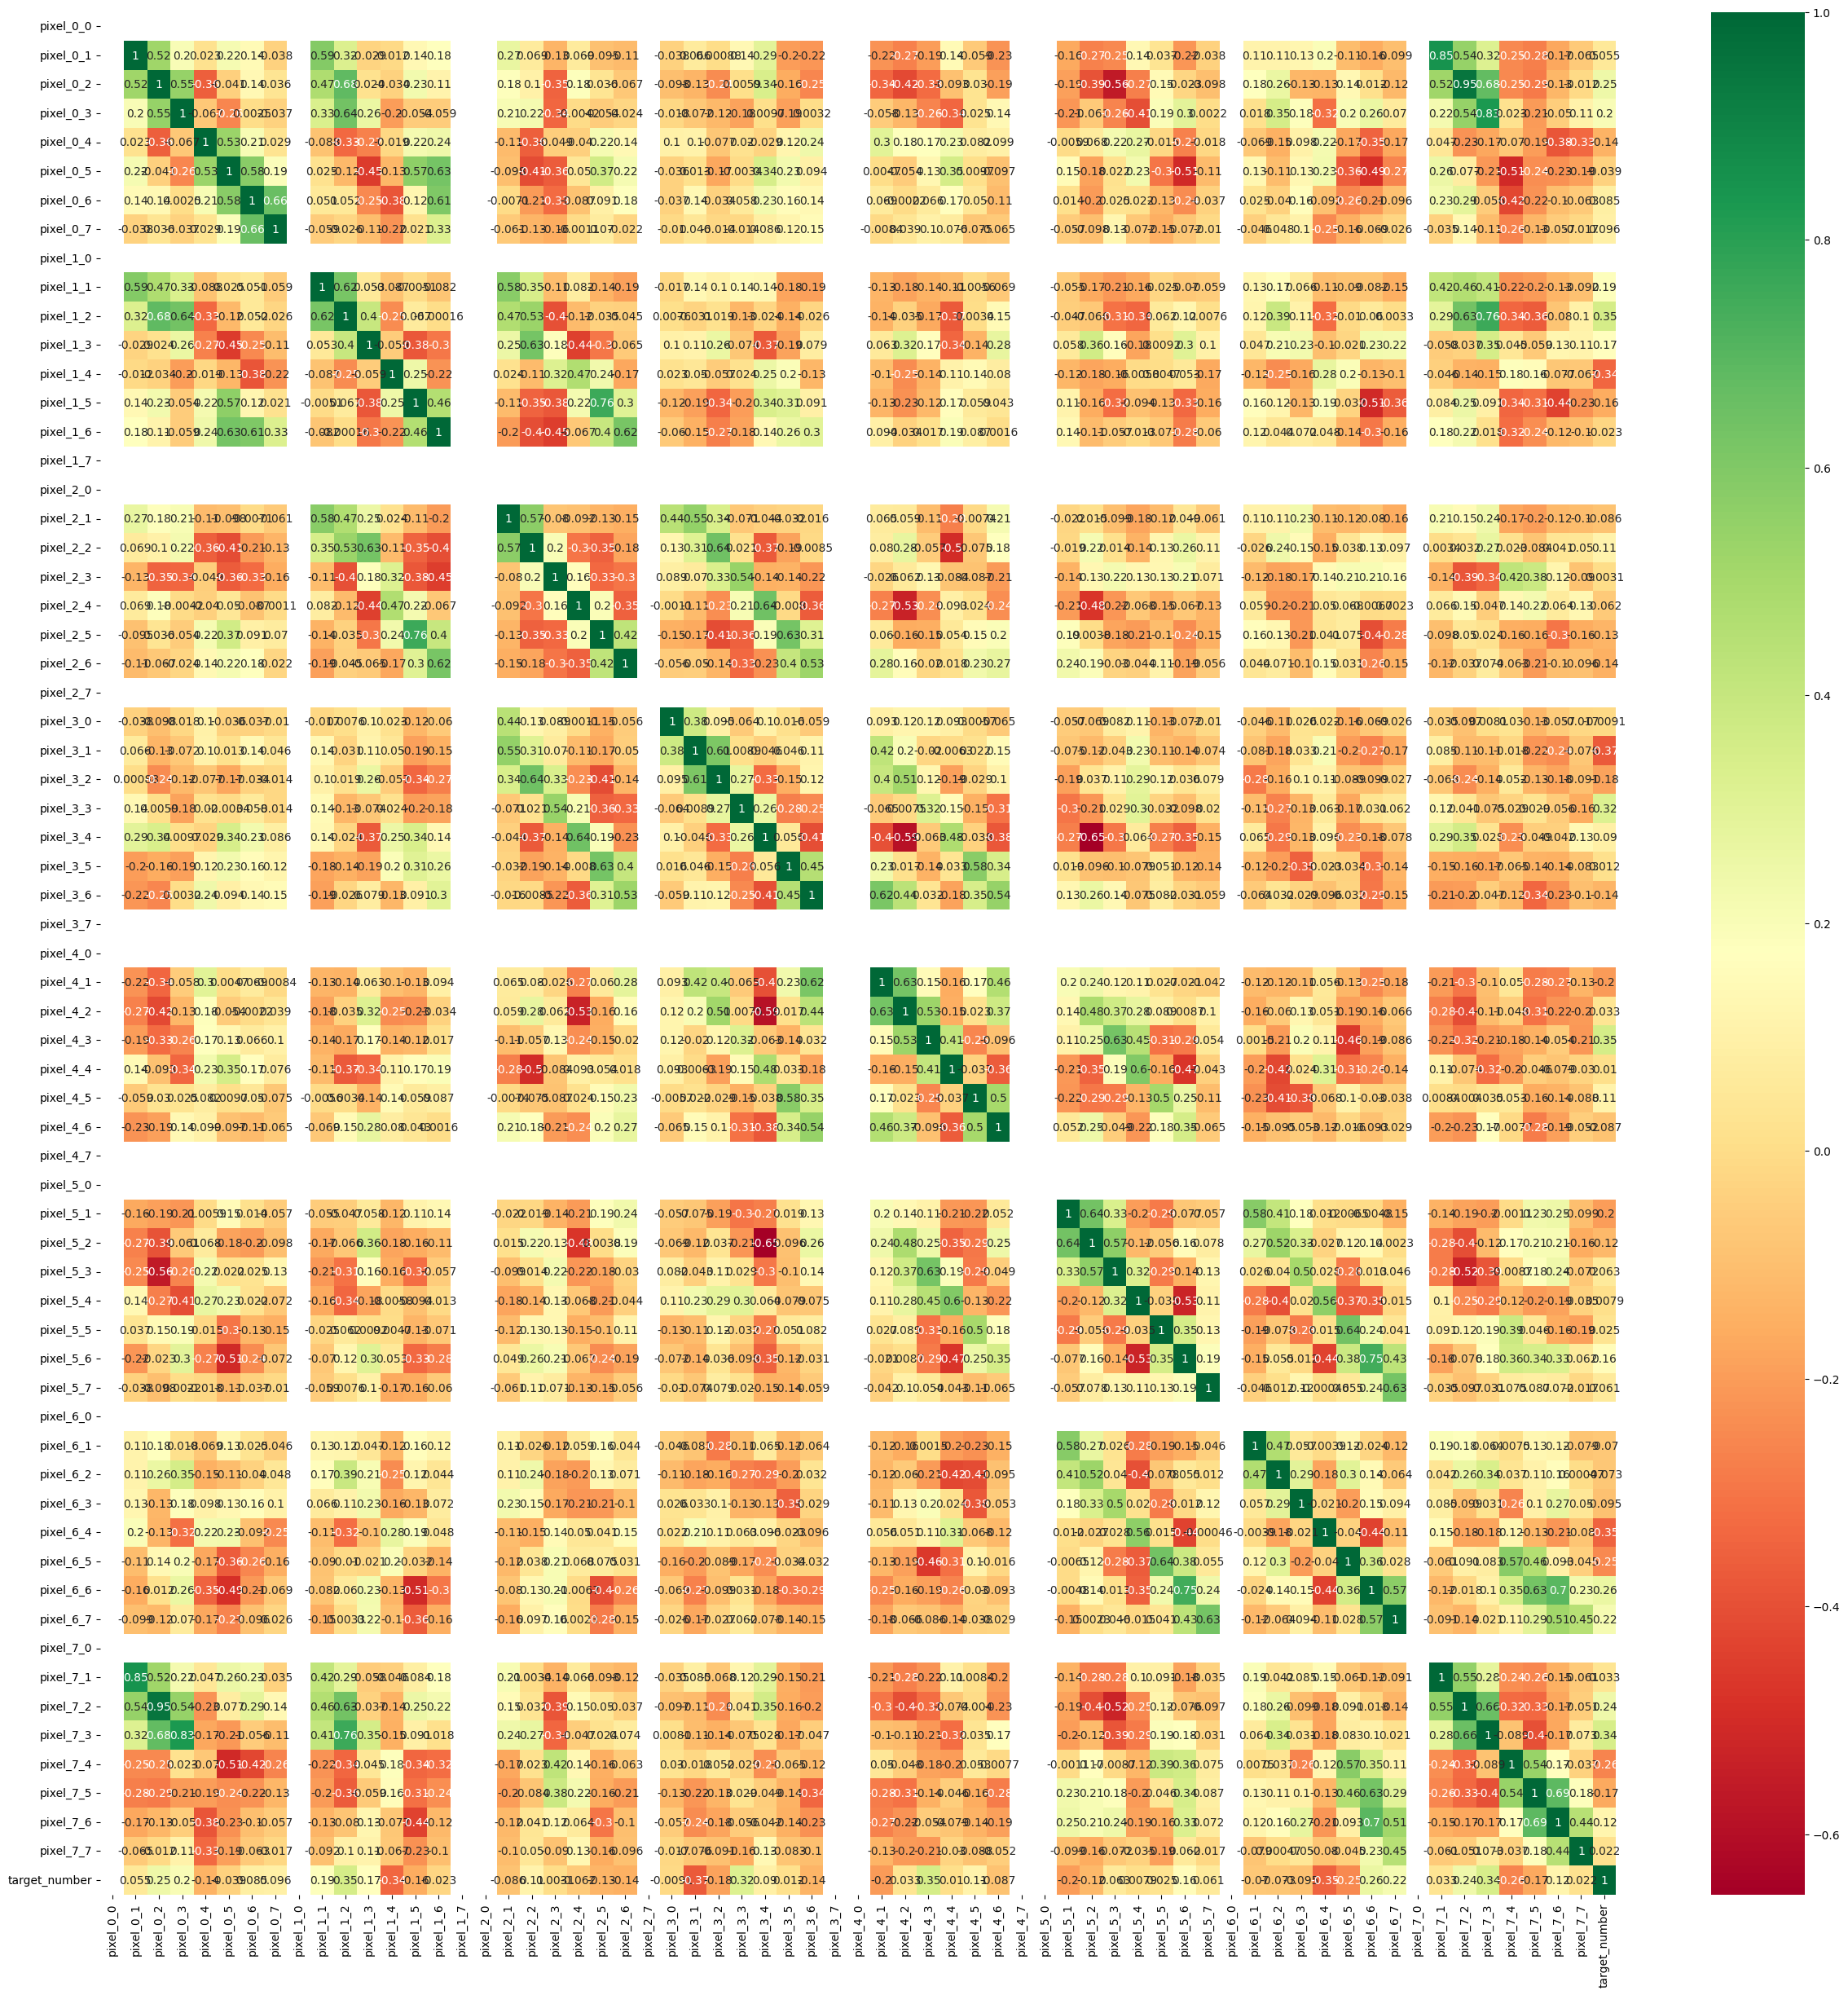

In [73]:
plt.figure(figsize=(30,30))
sns.heatmap(df.loc[:,df.columns!='target_numbers'].head(100).corr(), annot=True, cmap='RdYlGn')

In [58]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:1]#view one of the elements

array([[ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
        -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
         0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
        -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
        -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
         0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
         1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
        -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
        -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
         0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
         1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
        -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
        -0.36677122, -1.14664746, -0.5056698 , -0.19600752]])

In [56]:

cov_matrix = np.cov(X_scaled.T)
print(cov_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          1.00055679  0.55692803 ... -0.02988686  0.02656195
  -0.04391324]
 [ 0.          0.55692803  1.00055679 ... -0.04120565  0.07263924
   0.08256908]
 ...
 [ 0.         -0.02988686 -0.04120565 ...  1.00055679  0.64868875
   0.26213704]
 [ 0.          0.02656195  0.07263924 ...  0.64868875  1.00055679
   0.62077355]
 [ 0.         -0.04391324  0.08256908 ...  0.26213704  0.62077355
   1.00055679]]


In [49]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [50]:
sorted_index = np.argsort(eigenvalues)[::-1]#descending order of eigenvalues trick
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]

In [59]:
explained_variances = []
for i in range(len(eigenvalues)):
    explained_variances.append(eigenvalues[i] / np.sum(eigenvalues))
print(explained_variances)

[0.12033916097734915, 0.09561054403097885, 0.08444414892624559, 0.06498407907524159, 0.04860154875966398, 0.04214119869271939, 0.03942082803567385, 0.03389380924638347, 0.029982210116252253, 0.029320025512522198, 0.027818054635503332, 0.02577055092581997, 0.022753033157642568, 0.022271797395143407, 0.021652294318492516, 0.0191416660644213, 0.01775547085168191, 0.016380692742844243, 0.015964601688623445, 0.01489191187087821, 0.01347969565817935, 0.012719313702347457, 0.011658373505919492, 0.01057646598536318, 0.009753159471981071, 0.009445589897319976, 0.00863013826970725, 0.008366428536685143, 0.007976932484112405, 0.00746471370926062, 0.0072558215137027504, 0.006919112454811818, 0.006539085355726169, 0.0064079257384598385, 0.005913841117223411, 0.005711624052235216, 0.005236368034166347, 0.004818075864451418, 0.0008253509448180061, 0.004537192598584499, 0.00103695730155718, 0.0042316275323278, 0.004060530699790376, 0.003970848082758266, 0.0012510074249730112, 0.001351184113370859, 0.0

Text(0.5, 0, 'Principal components')

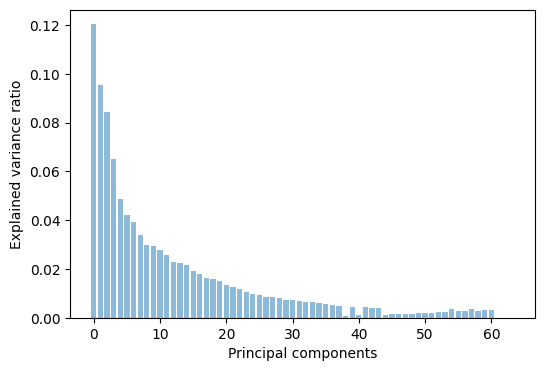

In [61]:
plt.figure(figsize=(6, 4))
plt.bar(range(64), explained_variances,alpha=0.5, align='center',label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

In [64]:
projected_1 = X_scaled.dot(eigenvectors.T[0])
projected_2 = X_scaled.dot(eigenvectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['Y'] = y
res.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Y
0,-1.914214,0.954502,-3.946035,-2.028723,-0.267173,0.530327,1.415321,0
1,-0.588980,-0.924636,3.924755,1.779850,-0.993430,-0.675652,-1.878565,1
2,-1.302039,0.317189,3.023333,2.043376,-2.081155,0.935121,1.296200,2
3,3.020770,0.868772,-0.801744,2.187039,-0.556813,0.727124,-0.959766,3
4,-4.528949,1.093480,0.973121,1.419510,-1.715106,1.431592,-1.073649,4


<Axes: xlabel='PC1', ylabel='PC2'>

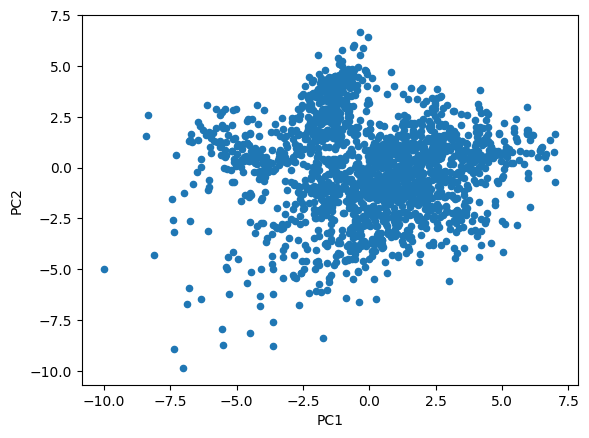

In [69]:
res.plot(kind="scatter", x="PC1",y="PC2")

# __Using Inbuilt Functions__

In [53]:
pca = PCA(n_components=2)
X_reduced_inbuilt = pca.fit_transform(X_scaled)